<a href="https://colab.research.google.com/github/amirghadimi80/Steganography_LSB_Python/blob/main/Steganography_LSB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from IPython.display import IFrame
IFrame("https://www.ctralie.com/VirtualCities/color.html", 200, 200)

(512, 512)
uint8


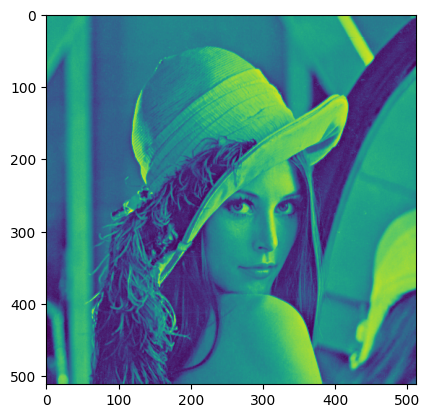

In [ ]:
I = plt.imread("/content/lena_gray.jpg")
plt.imshow(I)
print(I.shape)
print(I.dtype)

(512, 512)
uint8


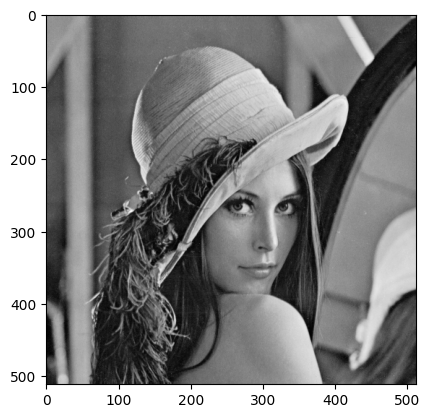

In [ ]:
# you have to use cmap = 'gray' to show grayscale of image
I = plt.imread("/content/lena_gray.jpg")
plt.imshow(I, cmap= 'gray')
print(I.shape)
print(I.dtype)

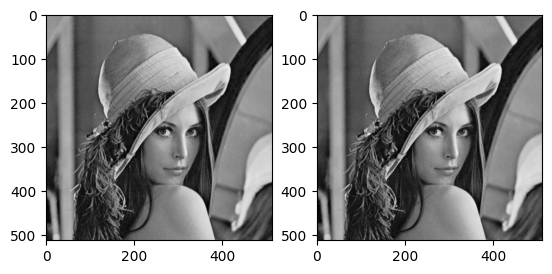

In [ ]:
IRound = I - I%2
#plt.subplot(1, 2, 1)
#the figure has 1 row, 2 columns, and this plot is the first plot.
plt.subplot(1, 2, 1)
plt.imshow(I, cmap = 'gray')
plt.subplot(1, 2, 2)
plt.imshow(IRound, cmap = 'gray')

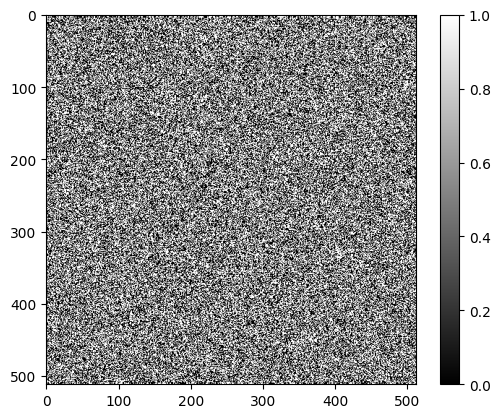

In [ ]:
plt.imshow(I[:, :]%2,  cmap = 'gray')
plt.colorbar()

ASCII code

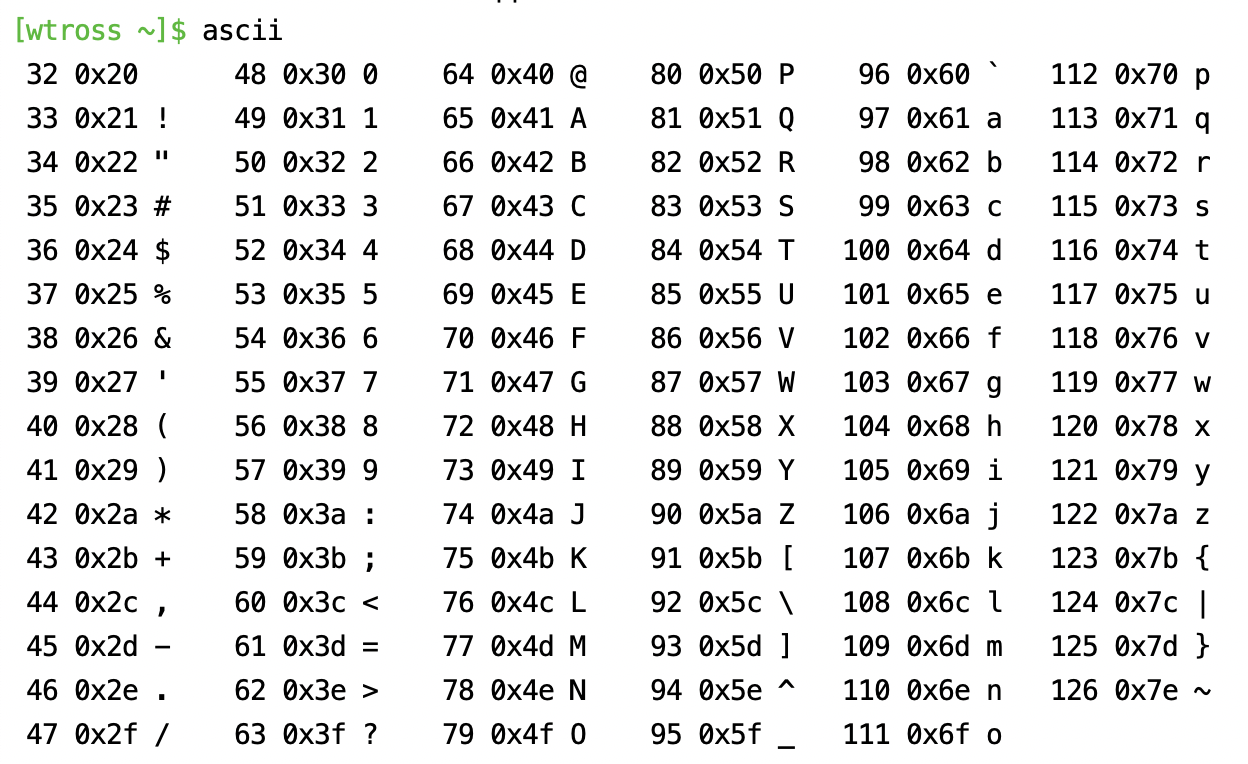

In [ ]:
ord("a")

97

In [ ]:
bin(ord("a"))

'0b1100001'

In [ ]:
def get_bin(c):
  x  = [int(x) for x in bin(ord(c))[2:]]


In [ ]:
c = "!"
x  = [int(x) for x in bin(ord(c))[2:]]
x

[1, 0, 0, 0, 0, 1]

In [ ]:
bin(ord("c"))

'0b1100011'

In [ ]:


def get_bin_char(c):
    """
    Return a list of 1's and 0's corresponding to the
    ASCII encoding of a character
    """
    x  = [int(x) for x in bin(ord(c))[2:]]
    x = [0]*(7-len(x)) + x
    return x

def get_bin_str(s):
    ret = []
    for c in s:
        ret += get_bin_char(c)
    ret += [0]*7 # Add on null terminator "\0"
    return ret

x = get_bin_str("Steganography")

print(x)

[1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(I)

[[155 155 155 ... 164 148 120]
 [155 155 155 ... 164 148 120]
 [155 155 155 ... 164 148 120]
 ...
 [ 35  35  43 ...  95  91  87]
 [ 37  36  48 ...  94  95  99]
 [ 37  37  48 ...  93  95  98]]


In [ ]:
print(I.flatten()[0:20])

[155 155 155 154 156 149 156 153 158 154 154 151 148 156 153 147 150 149
 155 155]


In [ ]:
#from row = 0 to row = 20
#from col = 0 to col = 20
print(I[0:20, 0:20])

[[155 155 155 154 156 149 156 153 158 154 154 151 148 156 153 147 150 149
  155 155]
 [155 155 155 154 155 149 156 153 159 154 154 152 148 156 153 147 151 149
  155 155]
 [155 155 155 155 155 149 156 153 158 154 155 152 148 156 153 147 151 149
  155 155]
 [155 155 155 154 155 148 157 153 158 154 154 152 148 156 153 148 151 150
  155 155]
 [155 155 155 154 155 148 156 153 158 154 154 152 148 156 154 147 151 148
  155 155]
 [157 157 150 148 154 151 151 152 153 153 147 152 147 146 149 147 150 149
  145 151]
 [153 153 157 151 153 155 151 148 152 155 149 155 148 148 149 144 146 153
  147 146]
 [151 151 148 150 151 151 148 150 151 154 154 151 146 146 145 143 148 146
  149 146]
 [148 147 151 151 152 153 149 150 156 150 150 152 152 147 148 149 148 147
  155 151]
 [148 148 151 152 147 147 148 150 154 146 147 150 151 150 150 144 148 146
  146 146]
 [149 149 149 153 149 147 147 144 152 150 150 148 153 146 151 146 148 150
  146 149]
 [149 148 150 152 152 148 142 140 151 151 151 150 149 147 149 151

In [ ]:
print(I.flatten())

[155 155 155 ...  93  95  98]


**Least Significant Bits(LSB) steganography**

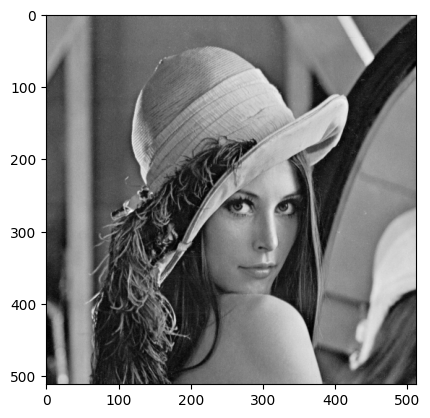

In [ ]:
# I = the image that we want to hide a text in it
# s = the hidden data

def encode(I, s):
    """
    Hide the string s in its ASCII representation inside
    of the least significant bit of image I

    Parameters
    ----------
    I: ndarray(rows, cols, 3)
        Carrier image
    s: string
        Hidden message string
  """


    ## Step 1: Get the binary string to hide
    x = get_bin_str(s)
    x = x + [0]*7
    x = np.array(x, dtype=np.uint8)
    ## Step 2: Round down the image to nearest even
    IRound = I - I%2
    ## Step 3: Put the binary data in some systematic
    ## order in the image
    IRound = IRound.flatten()
    IRound[0:x.size] += x # Adding in hidden bits
    return np.reshape(IRound, I.shape)

IEnc = encode(I, "Steganography")
plt.imshow(IEnc,  cmap = 'gray')



In [ ]:
places = np.array([2**(6-i) for i in range(7)])
places

array([64, 32, 16,  8,  4,  2,  1])

In [ ]:
places = np.array([2**(6-i) for i in range(7)])

IDec = IEnc.flatten()
i = 0
for k in range(10):
  c = IDec[i:i+7] % 2
  print(c, end= ':')
  c = np.sum(places * c)
  print(c, chr(c))
  i += 7

[1 0 1 0 0 1 1]:83 S
[1 1 1 0 1 0 0]:116 t
[1 1 0 0 1 0 1]:101 e
[1 1 0 0 1 1 1]:103 g
[1 1 0 0 0 0 1]:97 a
[1 1 0 1 1 1 0]:110 n
[1 1 0 1 1 1 1]:111 o
[1 1 0 0 1 1 1]:103 g
[1 1 1 0 0 1 0]:114 r
[1 1 0 0 0 0 1]:97 a


In [ ]:
def decode(IEnc):
    places = np.array([2**(6-i) for i in range(7)])
    IDec = IEnc.flatten()
    i = 0
    still_reading = True
    s = ""
    while still_reading:
        c = IDec[i:i+7] % 2
        c = np.sum(places*c)
        if c == 0:
            still_reading = False
        else:
            s += chr(c)
        i += 7
    return s



In [ ]:
decode(IEnc)


'Steganography'

In [ ]:
I2 = encode(I, "Hello")

In [ ]:
decode(I2)

'Hello'

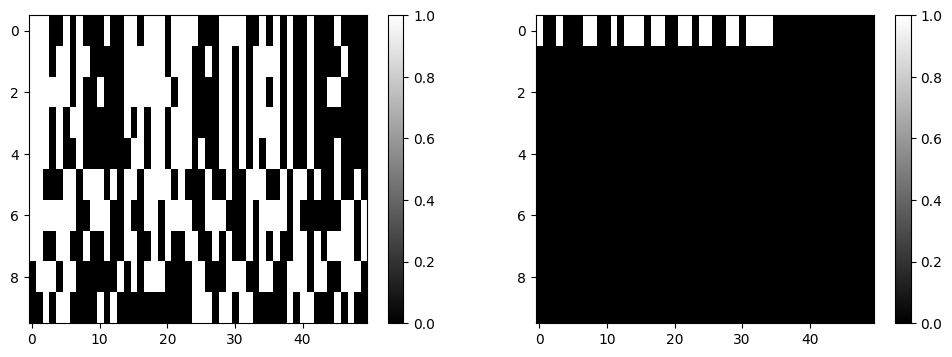

In [ ]:


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(I[0:10, 0:50]%2, cmap='gray', aspect='auto', interpolation='none')
plt.subplot(1, 2, 2)
plt.colorbar()
plt.imshow(I2[0:10, 0:50]%2, cmap='gray', aspect='auto', interpolation='none')
plt.colorbar()



## save Hidden Image

In [ ]:
import skimage.io # pip install scikit-image